# <center> Вложенные функции и область видимости. Практика

## <center> Задача о регистрации пользователей

### Задача №1

**Условие задачи**. Представим, что мы пишем некоторое приложение, предусматривающее регистрацию пользователей. Давайте реализуем небольшой функционал для регистрации.

Нам необходимо написать функцию register(surname, name, date, middle_name, registry).
Она будет иметь следующие аргументы:
* surname - фамилия пользователя
* name -  имя пользоваля
* date -  дата рождения пользователя в виде строки формата "DD.MM.YYYY" (например, "13.01.2001")
* middle_name - отчество пользователя
* registry - список, в который необходимо добавить полученные аргументы в виде кортежа в следующем порядке: фамилия, имя, отчество, день, месяц, год рождения

Регистрацию будем имитировать добавлением данных о пользователях в список в виде кортежа.
Функция должна возвращать список, в который добавила запись.


Образ результата, который мы хотим получить:
```python
reg = register('Petrova', 'Maria', '13.03.2003', 'Ivanovna')
reg = register('Ivanov', 'Sergej', '24.09.1995', registry=reg)
reg = register('Smith', 'John', '13.02.2003', registry=reg)
print(reg)

## [('Petrova', 'Maria', 'Ivanovna', 13, 3, 2003), ('Ivanov', 'Sergej', None, 24, 9, 1995), ('Smith', 'John', None, 13, 2, 2003)]
```


**Примечание:**

> Необходимо сделать отчество аргументом по умолчанию со значением None, так как отчество может быть не у всех регистрирующихся.

> Значения дня, месяца и года рождения должны быть представлены в виде целых чисел.

> Также нужно сделать так, чтобы пустой список создавался в том случае, если он не был передан извне. То есть по умолчанию registry имеет значение None, и если при вызове функции список так и не был передан, то он создается в теле функции.


In [ ]:
# Вспомогательная функция для предобработки даты
def preprocessing_date(date):
    # Разделяем строку по символу точки
    day, month, year = date.split('.')
    # Преобразуем все данные к типу данных int
    day, month, year = int(day), int(month), int(year)
    return day, month, year

print(preprocessing_date('13.03.2003'))
## Будет выведено:
## (13, 3, 2003)

(13, 3, 2003)


In [ ]:
# Функция для регистрации пользователей
def register(surname, name, date, middle_name=None, registry=None):
    # Вспомогательная функция для предобработки даты
    def preprocessing_date(date):
        # Разделяем строку по символу точки
        day, month, year = date.split('.')
        # Преобразуем все данные к типу данных int
        day, month, year = int(day), int(month), int(year)
        return day, month, year
    # Если список не был передан — создаём пустой список
    if registry is None:
        registry = list()
    # Разделяем дату на составляющие
    day, month, year = preprocessing_date(date)
    # Добавляем данные в список
    registry.append((surname, name, middle_name, day, month, year))
    return registry


## Вызываем функцию для регистрации
# Если список registry не передаётся, то он создаётся внутри функции
reg = register('Petrova', 'Maria', '13.03.2003', 'Ivanovna')
reg = register('Ivanov', 'Sergej', '24.09.1995', registry=reg)
reg = register('Smith', 'John', '13.02.2003', registry=reg)
print(reg)


[('Petrova', 'Maria', 'Ivanovna', 13, 3, 2003), ('Ivanov', 'Sergej', None, 24, 9, 1995), ('Smith', 'John', None, 13, 2, 2003)]


Отлично, наша функция для регистрации работает.

Однако, мы не учли одну очень важную вещь - “проверку на дурака”. Что это такое?

> При разработке пользовательского интерфейса и программ, взаимодействующих с человеком, очень важна проверка корректности введенных пользователем данных. Такую проверку в сообществе программистов как раз и принято называть "проверка на дурака". Некорректно введенные данные могут "сломать" вашу программу, если она не была подготовлена для их обработки.


In [ ]:
reg = register('Ivanov', 'Sergej', '24.13.1995')
print(reg)

[('Ivanov', 'Sergej', None, 24, 13, 1995)]


Давайте напишем функцию check_date(day, month, year), которая проверяет корректность даты рождения по следующим условиям:
* Все аргументы должны быть целыми числами.
* Годом рождения не может быть год до 1900 и год после 2022.
* Номер месяца не может быть больше 12 и меньше 1.
* Номер дня не может быть больше 31 и меньше 1.
* В сентябре, апреле, июне и ноябре 30 дней.
* В феврале (2ой месяц) должно быть 28 дней.

Если дата корректна, наша функция должна вернуть True, если же хотя бы одно из представленных условий не было выполнено — False

In [ ]:
# Функция для проверки корректности даты
def check_date(day, month, year):
    #Проверяем день, месяц и год на целочисленность
    if (type(day) is not int) or (type(month) is not int) or (type(year) is not int):
        return False
    #Проверяем год на заданный диапазон
    if (year <= 1900) or (year >= 2022):
        return False
    #Проверяем месяц на заданный диапазон
    if (month < 1) or (month > 12):
        return False
    #Проверяем день на заданный диапазон
    if (day < 1) or (day > 31):
        return False
    #Проверяем апрель, июнь, сентябрь и ноябрь на количество дней
    if (month in [4,6,9,11]) and (day > 30):
        return False
    #Проверяем количество дней в феврале
    if month == 2 and day > 28:
        return False
    return True

print(check_date(18, 9, 1999))
print(check_date(13, 13, 2021))
print(check_date(37, 1, 2020))
print(check_date(13.5, 12, 2021))

True
False
False
False


Наша функция работает, однако при реализации логики своего решения, мы допустили одну грубую ошибку. Подумайте какую?


#### Ответ:




Мы забыли учесть високосные года. В високосном году в феврале не 28 дней, а 29. Поэтому результат работы нашей функции для следующих данных:
```
print(check_date(29,2,2020))
## False
```
Будет неверным.

## <center> **Задача о геометрических фигурах**

### Задача №2

**Условие задачи.** Мы разрабатываем приложение для графических дизайнеров. Идея приложения состоит в следующем: пользователь выбирает тип фигуры и ставит на экране точки, а приложение по этим точкам рисует фигуру, а также выводит ее площадь и периметр.

Рисовать с помощью Python, мы пока что не умеем, однако, мы можем реализовать другую часть нашего приложения - расчет параметров фигуры.

Одной из основополагающих геометрических фигур, используемых в дизайне является треугольник. Каждый треугольник задается тремя точками, каждая из которых имеет свои координаты x и y на плоскости: $P_1=(x_1, y_1)$, $P_2=(x_2, y_2)$ и $P_3=(x_3, y_3)$.

Предположим, что в нашем приложении есть возможность отрисовки треугольника по введенным пользователем координатам трех его точек. Каждая из трех точек представляет собой кортеж из двух чисел - координата точки по оси x и по оси y соответственно.

Например, переменные:
```
p1, p2, p3 = (2, 2), (4, 1.25), (1, 4.5)
```
задают следующий треугольник:

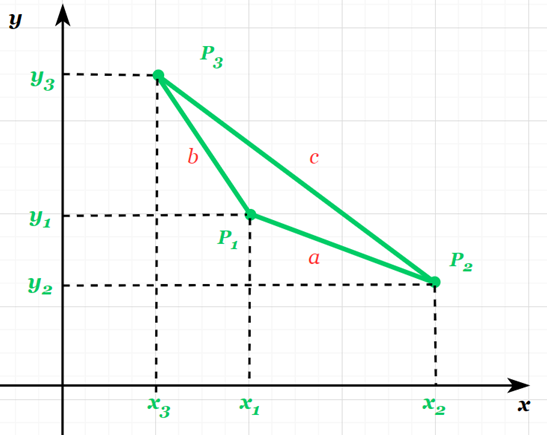


Необходимо реализовать функцию triangle(), которая будет принимать на вход координаты трех точек p1, p2 и p3 и возвращать длины сторон треугольника, его периметр и площадь в виде словаря.

Примеры вызова функции:
```python
print(triangle(p1=(2, 2), p2=(4, 1.25), p3=(1, 4.5)))
## {'a': 2.1360009363293826, 'b': 2.692582403567252, 'c': 4.422951503238533, 'perimeter': 9.251534843135168, 'area': 2.1250000000000027}

print(triangle(p1=(1, 1), p2=(1, 4), p3=(5, 1)))
## {'a': 3.0, 'b': 4.0, 'c': 5.0, 'perimeter': 12.0, 'area': 6.0}
```

**Решение**:

По условию задачи нам сначала необходимо вычислить длины сторон треугольника по координатам его точек. Для этого нам нужно вспомнить школьный курс геометрии. Давайте нарисуем произвольный треугольник $P_1P_2P_3$ в двумерной системе координат:
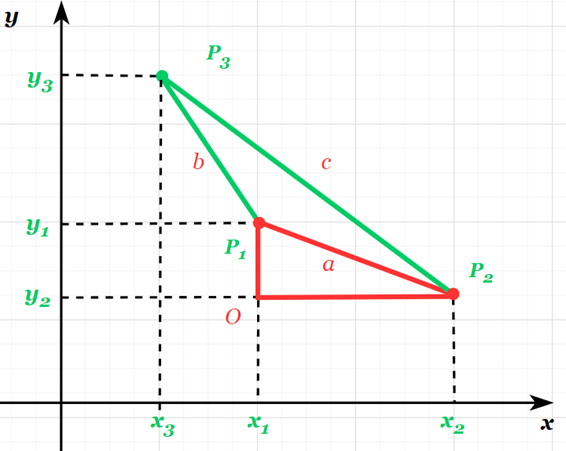

Заметим из рисунка, что длину стороны a можно выразить из треугольника $P_1OP_2$ (отмечен красным цветом) по теореме Пифагора. В этом треугольнике сторона a - гипотенуза. Как известно, квадрат гипотенузы равен сумме квадратов катетов:
$$a^2= (P_1O)^2+(P_2O)^2$$

Чтобы получить саму сторону a, нужно извлечь квадратный корень:
$$a=P_1P_2= \sqrt{(P_1O)^2+(P_2O)^2}$$

В свою очередь длины $P_1O$ и $P_2O$, опять же из рисунка, будут равны:
$$P_1O=y_1-y_2$$
$$P_2O=x_2-x_1$$
Так как при возведении разницы в квадрат не имеет значения что из чего вычитать, то формулу для a можно записать следующим образом (при подставке поменяли $y_2$ и $y_1$ местами):
$$ a=P_1P_2=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

Аналогично можно найти и другие стороны b и c:

$$b=P_1P_3=\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}$$
$$c=P_2P_3=\sqrt{(x_3-x_2)^2+(y_3-y_2)^2} $$

Итак, мы решили первую часть задачи! Осталось только реализовать приведенные рассуждения в виде кода.

In [ ]:
# Функция для вычисления сторон треугольника
def sides(p1, p2, p3):
    # Распаковываем кортежи для удобства
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # Вычисляем стороны по теореме Пифагора
    a = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    b = ((x3 - x1) ** 2 + (y3 - y1) ** 2) ** 0.5
    c = ((x3 - x2) ** 2 + (y3 - y2) ** 2) ** 0.5
    return a, b, c

print(sides(p1=(2, 2), p2=(4, 1.25), p3=(1, 4.5)))
print(sides(p1=(1, 1), p2=(1, 4), p3=(5, 1)))

(2.1360009363293826, 2.692582403567252, 4.422951503238533)
(3.0, 4.0, 5.0)


Отлично, стороны вычислять научились. Перейдем к площади и периметру.



Тут все предельно просто, если у треугольника известны длины всех трех сторон, то его периметр - это просто сумма всех его сторон:
$$P=a+b+c$$


Если, есть периметр треугольника, то его площадь можно вычислить по формуле Герона:

$$S=\sqrt{p(p-a)(p-b)(p-c)}$$,

$$p=\frac{P}{2}=\frac{a+b+c}{2}$$

Теперь реализуем это в коде.

In [ ]:
# Функция для вычисления периметра треугольника
def calculate_perimeter_triangle(a, b, c):
    # Периметр - сумма всех сторон треугольника
    perimeter = a + b + c
    return perimeter

# Функция для вычисления площади треугольника
def calculate_area_triangle(a, b, c):
    # Вычисляем полупериметр
    p = calculate_perimeter_triangle(a, b, c) / 2
    # Вычисляем площадь по формуле Герона
    area = (p * (p - a) * (p - b) * (p - c)) ** 0.5
    return area

print(calculate_perimeter_triangle(a=3, b=4, c=5))
print(calculate_area_triangle(a=3, b=4, c=5))

12
6.0


In [ ]:
def triangle(p1, p2, p3):
    # Функция для вычисления сторон треугольника
    # По умолчанию параметры функции берутся из объемлющей области видимости
    def sides(p1, p2, p3):
        # Распаковываем кортежи для удобства, ; означает новую строку кода
        x1, y1 = p1; x2, y2 = p2; x3, y3 = p3
        # Вычисляем стороны по теореме Пифагора
        a = ((x2 - x1) ** 2 + (y2 - y1)** 2) ** 0.5
        b = ((x3 - x1) ** 2 + (y3 - y1)** 2) ** 0.5
        c = ((x3 - x2) ** 2 + (y3 - y2)** 2) ** 0.5
        return a, b, c

    # Функция для вычисления периметра треугольника
    def calculate_perimeter_triangle(a, b, c):
        # Периметр - сумма всех сторон треугольника
        perimeter = a + b + c
        return perimeter

    # Функция для вычисления площади треугольника
    def calculate_area_triangle(a, b, c):
        # Вычисляем полупериметр
        # Значение perimeter берется из объемлющей области видимости
        p = perimeter / 2
        # Вычисляем площадь по формуле Герона
        area = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return area
    a, b, c = sides(p1, p2, p3)
    perimeter = calculate_perimeter_triangle(a, b, c)
    area = calculate_area_triangle(a, b, c)
    result = {'a': a, 'b': b, 'c': c, 'perimeter': perimeter, 'area': area}
    return result

print(triangle(p1=(2, 2), p2=(4, 1.25), p3=(1, 4.5)))
print(triangle(p1=(1, 1), p2=(1, 4), p3=(5, 1)))

{'a': 2.1360009363293826, 'b': 2.692582403567252, 'c': 4.422951503238533, 'perimeter': 9.251534843135168, 'area': 2.1250000000000027}
{'a': 3.0, 'b': 4.0, 'c': 5.0, 'perimeter': 12.0, 'area': 6.0}


Обратите внимание на интересные детали:
* Для сокращения количества строк кода, мы записали распаковку кортежей p1, p2, p3 в виде одной строки кода, для этого можно использовать точку с запятой.
* В функции calcalate_area_triangle() мы убрали лишний вызов функции calcalate_perimeter_triangle(), так как периметр вычисляется в теле внешней функции, а значит мы можем обращаться к переменной perimeter из объемлющей области видимости и это не приведет к ошибке.
